<a href="https://colab.research.google.com/github/mikolaj553/Machine-Learning-Homeworks-Repo/blob/main/ml_hw12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Homework #12 - Mikołaj Kowalewski, lab group no. 1**

# 1. Semantic Pair Classes

We will start the assignment with presenting 10 distinct classes of words, each containing 5 word-pairs, for a total of 50 pairs (100 unique words).

---

## Step 1: Picking 10 Coherent Semantic Categories

Here are the 10 categories we have pickedfor this task::

1. **Gender** (e.g. “king ↔ queen”)  
2. **Verb Tense (Past Tense)** (e.g. “bring ↔ brought”)  
3. **Singular ↔ Plural** (e.g. “cat ↔ cats”)  
4. **Country ↔ Capital** (e.g. “France ↔ Paris”)  
5. **Antonyms** (e.g. “hot ↔ cold”)  
6. **Tool ↔ User** (e.g. “hammer ↔ carpenter”)  
7. **Currency ↔ Country** (e.g. “yen ↔ Japan”)  
8. **Part ↔ Whole** (e.g. “wheel ↔ car”)  
9. **Profession ↔ Workplace** (e.g. “teacher ↔ school”)  
10. **Positive ↔ Comparative (Adjective Forms)** (e.g. “big ↔ bigger”)  

Each of these categories is conceptually coherent: all five pairs in **Gender** share the same theme (“male-female” relationships), all five pairs in **Antonyms** are opposite-meaning pairs, and so on.

---

## Step 2: For Each Category, We List 5 Pairs

Below is our choice of ten categories, each with exactly five pairs. None of the 100 words appears in more than one pair, so we have 100 unique words in total.

---

### 1. Gender  
- (king , queen)  
- (man , woman)  
- (prince , princess)  
- (uncle , aunt)  
- (father , mother)  

> *All five of these are clear “male ↔ female” counterparts.*

---

### 2. Verb Tense (Past Tense)  
- (bring , brought)  
- (get , got)  
- (make , made)  
- (see , saw)  
- (go , went)  

> *Each pair is a base-form verb vs. its simple past form.*

---

### 3. Singular ↔ Plural  
- (cat , cats)  
- (child , children)  
- (mouse , mice)  
- (tooth , teeth)  
- (person , people)  

> *Five examples of irregular pluralization in English.*

---

### 4. Country ↔ Capital  
- (France , Paris)  
- (Japan , Tokyo)  
- (Egypt , Cairo)  
- (Canada , Ottawa)  
- (Brazil , Brasilia)  

> *Five different countries matched with their capitals. In the code, we will use lowercase to match with GloVe tokens*

---

### 5. Antonyms  
- (hot , cold)  
- (up , down)  
- (happy , sad)  
- (light , dark)  
- (true , false)  

> *Five clear “opposite-meaning” pairs.*

---

### 6. Tool ↔ User  
- (pen , writer)  
- (hammer , carpenter)  
- (brush , painter)  
- (scalpel , surgeon)  
- (camera , photographer)  

> *Each pair is “a tool” versus “the person who uses that tool.”*

---

### 7. Currency ↔ Country  
- (ringgit , Malaysia)  
- (won , South Korea)  
- (peso , Argentina)  
- (ruble , Russia)  
- (lira , Turkey)  

> *Each pair is “currency vs. issuing country.” These countries are distinct from the ones in Class 4, so there’s no overlap.*

---

### 8. Part ↔ Whole  
- (wheel , car)  
- (finger , hand)  
- (leaf , tree)  
- (page , book)  
- (petal , flower)  

> *Each pair is a “part” of something larger (“whole”).*

---

### 9. Profession ↔ Workplace  
- (teacher , school)  
- (doctor , hospital)  
- (chef , kitchen)  
- (pilot , airport)  
- (farmer , farm)  

> *Each pair is “someone’s job” versus “the place where they do that job.”*

---

### 10. Positive ↔ Comparative (Adjective Forms)  
- (big , bigger)  
- (small , smaller)  
- (tall , taller)  
- (young , younger)  
- (old , older)  

> *Here each pair is “base adjective ↔ comparative form.”*

---

In summary:

| Class # | Category                 | Pair 1               | Pair 2               | Pair 3               | Pair 4               | Pair 5                  |
|:-------:|:-------------------------|:---------------------|:---------------------|:---------------------|:---------------------|:------------------------|
| 1       | Gender                   | (king , queen)       | (man , woman)        | (prince , princess)  | (uncle , aunt)       | (father , mother)       |
| 2       | Verb Tense (Past)        | (bring , brought)    | (get , got)          | (make , made)        | (see , saw)          | (go , went)             |
| 3       | Singular ↔ Plural        | (cat , cats)         | (child , children)   | (mouse , mice)       | (tooth , teeth)      | (person , people)       |
| 4       | Country ↔ Capital        | (France , Paris)     | (Japan , Tokyo)      | (Egypt , Cairo)      | (Canada , Ottawa)    | (Brazil , Brasilia)      |
| 5       | Antonyms                 | (hot , cold)         | (up , down)          | (happy , sad)        | (light , dark)       | (true , false)          |
| 6       | Tool ↔ User              | (pen , writer)       | (hammer , carpenter) | (brush , painter)    | (scalpel , surgeon)  | (camera , photographer)  |
| 7       | Currency ↔ Country       | (ringgit , Malaysia) | (won , South Korea)  | (peso , Argentina)   | (ruble , Russia)     | (lira , Turkey)         |
| 8       | Part ↔ Whole             | (wheel , car)        | (finger , hand)      | (leaf , tree)        | (page , book)        | (petal , flower)        |
| 9       | Profession ↔ Workplace   | (teacher , school)   | (doctor , hospital)  | (chef , kitchen)     | (pilot , airport)    | (farmer , farm)         |
| 10      | Positive ↔ Comparative   | (big , bigger)       | (small , smaller)    | (tall , taller)      | (young , younger)    | (old , older)           |



# Part 2: Global PCA (Across All Words)

In this section, we will:

1. Download a pre-trained embedding file (GloVe) and load it into Colab.  
2. Define our 10 semantic classes (from the first part)
3. Fetch the 2D PCA projection of all 100 word vectors.  
4. Plot a global scatter plot of all 100 points (color‐coded by class and labeled by word).  
5. Plot 10 separate charts, one per class, each showing only that class’s 10 words (5 pairs).

In [1]:
!pip install --quiet gensim tqdm

In [2]:
import os
import urllib.request
import zipfile

glove_folder = "/content/glove.6B"
glove_zip    = "/content/glove.6B.zip"
glove_txt    = os.path.join(glove_folder, "glove.6B.100d.txt")

if not os.path.exists(glove_txt):
    urllib.request.urlretrieve(
        "http://nlp.stanford.edu/data/glove.6B.zip",
        glove_zip
    )
    with zipfile.ZipFile(glove_zip, "r") as z:
        z.extractall(glove_folder)

In [3]:
# Defining the 10 semantic classes (all words lowercase, no underscores where GloVe can't find them)
classes = {
    "Gender": [
        ("king",   "queen"),
        ("man",    "woman"),
        ("prince", "princess"),
        ("uncle",  "aunt"),
        ("father", "mother"),
    ],
    "Verb_Tense_Past": [
        ("bring", "brought"),
        ("get",   "got"),
        ("make",  "made"),
        ("see",   "saw"),
        ("go",    "went"),
    ],
    "Singular_Plural": [
        ("cat",     "cats"),
        ("child",   "children"),
        ("mouse",   "mice"),
        ("tooth",   "teeth"),
        ("person",  "people"),
    ],
    "Country_Capital": [
        ("france",  "paris"),
        ("japan",   "tokyo"),
        ("egypt",   "cairo"),
        ("canada",  "ottawa"),
        ("brazil",  "brasilia"),
    ],
    "Antonyms": [
        ("hot",   "cold"),
        ("up",    "down"),
        ("happy", "sad"),
        ("light", "dark"),
        ("true",  "false"),
    ],
    "Tool_User": [
        ("pen",         "writer"),
        ("hammer",      "carpenter"),
        ("brush",       "painter"),
        ("scalpel",     "surgeon"),
        ("camera",      "photographer"),
    ],
    "Currency_Country": [
        ("ringgit",    "malaysia"),
        ("won",        "korea"),
        ("peso",       "argentina"),
        ("ruble",      "russia"),
        ("lira",       "turkey"),
    ],
    "Part_Whole": [
        ("wheel",  "car"),
        ("finger", "hand"),
        ("leaf",   "tree"),
        ("page",   "book"),
        ("petal",  "flower"),
    ],
    "Profession_Workplace": [
        ("teacher", "school"),
        ("doctor",  "hospital"),
        ("chef",    "kitchen"),
        ("pilot",   "airport"),
        ("farmer",  "farm"),
    ],
    "Positive_Comparative": [
        ("big",    "bigger"),
        ("small",  "smaller"),
        ("tall",   "taller"),
        ("young",  "younger"),
        ("old",    "older"),
    ],
}

# Flattening into a list of 100 words and tracking classes
all_words = []
word_to_class = {}
for cname, pairs in classes.items():
    for w1, w2 in pairs:
        all_words.append(w1)
        all_words.append(w2)
        word_to_class[w1] = cname
        word_to_class[w2] = cname

In [4]:
# Reading GloVe file and extracting embeddings for the 100 words (lowercase)
import numpy as np
from tqdm import tqdm

glove_path = glove_txt  # "/content/glove.6B/glove.6B.100d.txt"
target_set = set(all_words)
embeddings_dict = {}

with open(glove_path, "r", encoding="utf8") as f:
    for line in tqdm(f, total=400000):
        parts = line.rstrip().split(" ")
        word = parts[0]
        if word in target_set:
            embeddings_dict[word] = np.array(parts[1:], dtype=np.float32)
            if len(embeddings_dict) == len(target_set):
                break

vectors = np.vstack([embeddings_dict[w] for w in all_words])

 15%|█▍        | 59544/400000 [00:00<00:03, 104094.86it/s]


In [6]:
# 6. Running PCA (scikit-learn) on the (100 × 100) matrix → (100 × 2)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
coords_2d = pca.fit_transform(vectors)

# Building lookup: word → (x, y)
word_to_coord = {w: coords_2d[i] for i, w in enumerate(all_words)}


In [14]:
!pip install --quiet adjustText

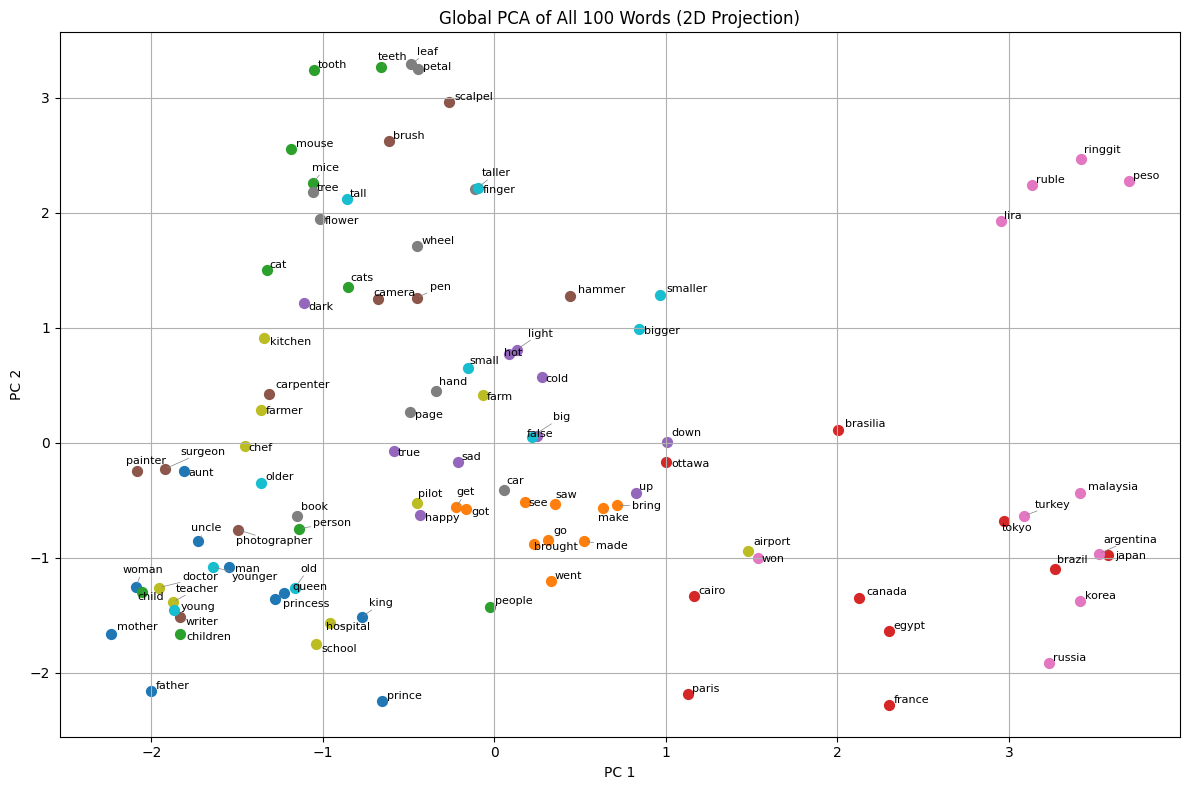

In [17]:
# Plotting with Matplotlib

import matplotlib.pyplot as plt
from adjustText import adjust_text

colors = {
    "Gender":               "tab:blue",
    "Verb_Tense_Past":      "tab:orange",
    "Singular_Plural":      "tab:green",
    "Country_Capital":      "tab:red",
    "Antonyms":             "tab:purple",
    "Tool_User":            "tab:brown",
    "Currency_Country":     "tab:pink",
    "Part_Whole":           "tab:gray",
    "Profession_Workplace": "tab:olive",
    "Positive_Comparative": "tab:cyan"
}

# 1. Global scatter + labels
plt.figure(figsize=(12, 8))
texts = []
for w, (x, y) in word_to_coord.items():
    cls = word_to_class[w]
    plt.scatter(x, y, color=colors[cls], s=50)
    texts.append(plt.text(x, y, w, fontsize=8))

plt.title("Global PCA of All 100 Words (2D Projection)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid(True)
adjust_text(texts, arrowprops=dict(arrowstyle="-", color="gray", lw=0.5))
plt.tight_layout()
plt.show()

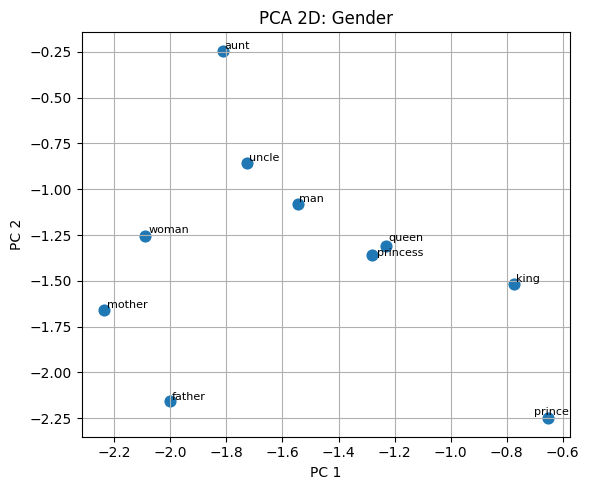

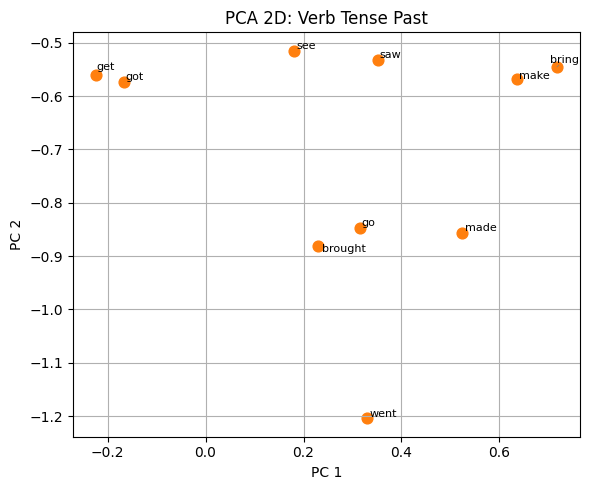

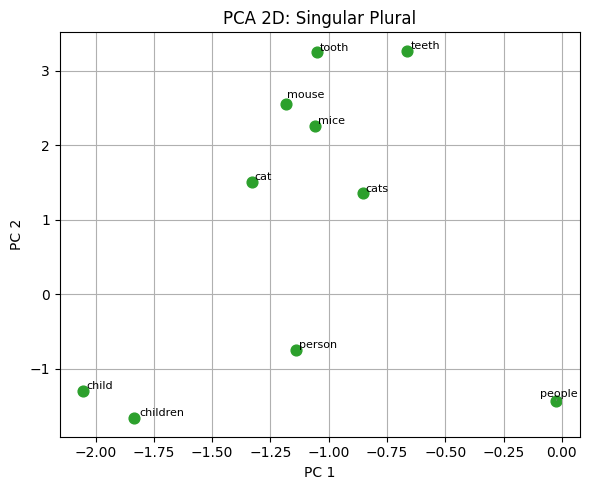

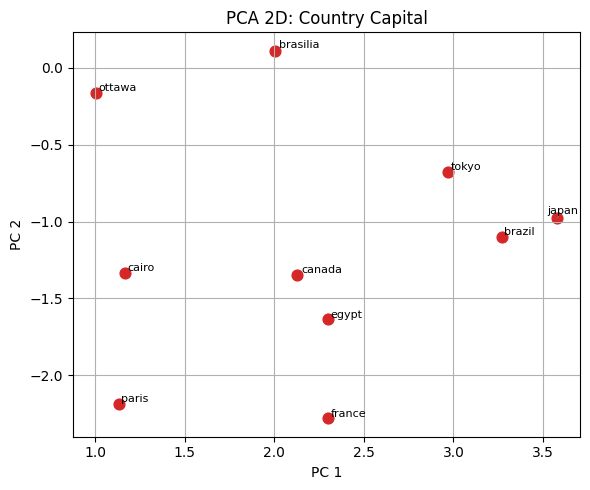

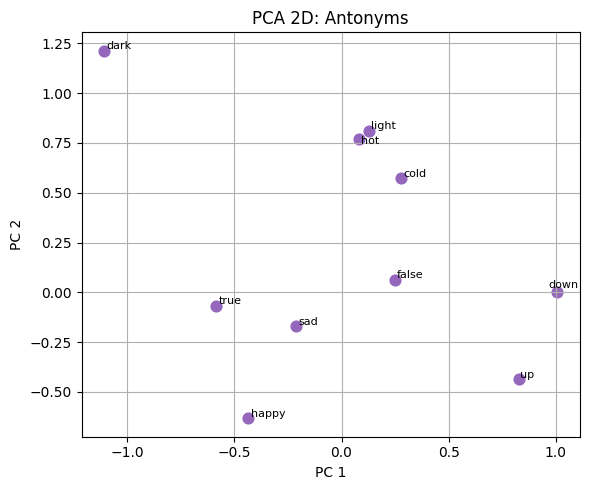

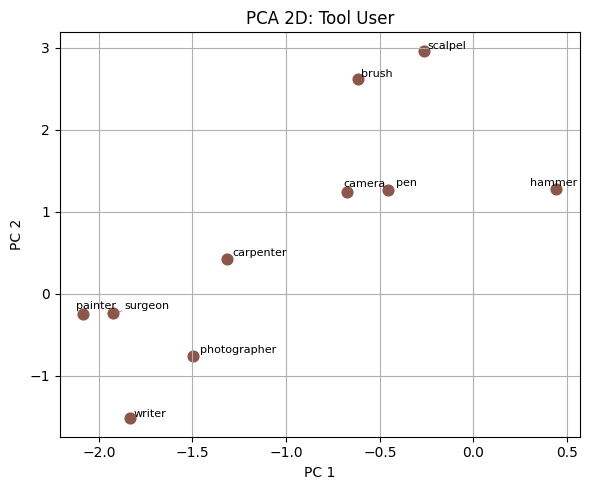

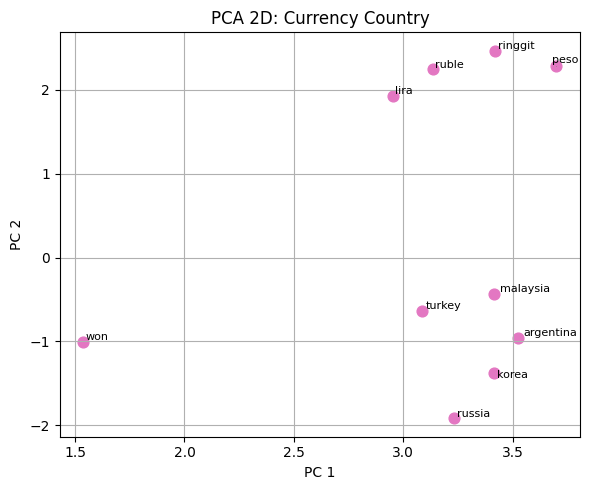

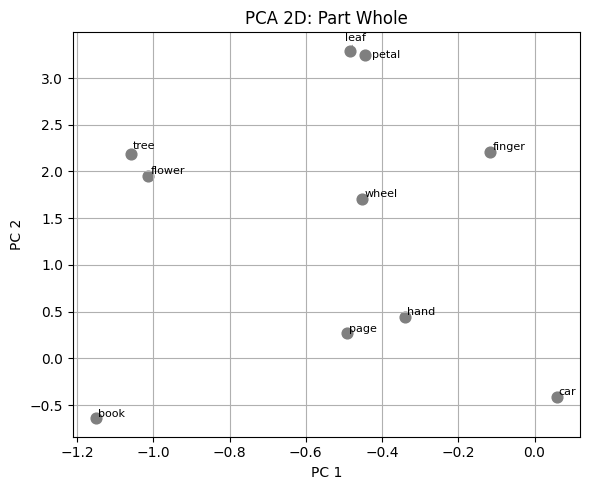

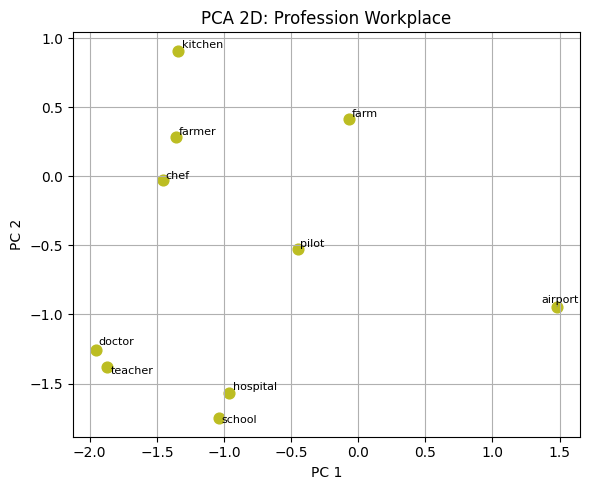

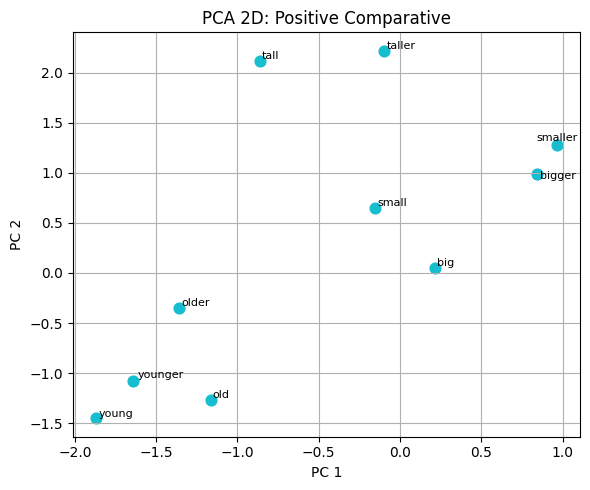

In [18]:
# Plotting 2: Per-class scatter + labels (10 words each)
for cname, pairs in classes.items():
    plt.figure(figsize=(6, 5))
    plt.title(f"PCA 2D: {cname.replace('_', ' ')}")
    texts = []
    for w1, w2 in pairs:
        for w in (w1, w2):
            x, y = word_to_coord[w]
            plt.scatter(x, y, color=colors[cname], s=60)
            texts.append(plt.text(x, y, w, fontsize=8))
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    plt.grid(True)
    adjust_text(texts, arrowprops=dict(arrowstyle="-", color="gray", lw=0.5))
    plt.tight_layout()
    plt.show()

# Part 3: Local PCA (Per Class)

In this section, we will perform a class‐wise PCA on each of the 10 semantic classes defined in Part 1. Instead of projecting all 100 word vectors together, we will:

1. Isolate each semantic class (10 words per class, since each class contains 5 pairs).  
2. Run PCA only on those 10 word vectors (e.g. if the class is “Gender,” we take the 10 vectors for “king, queen, man, woman, …, mother”).  
3. Reduce the 10×D embedding matrix to 10×2 via scikit‐learn’s `PCA(n_components=2)`.  
4. Plot a separate 2D scatterplot for each class:  
   - Each chart will show exactly those 10 points (words) in 2D PCA space.  
   - Points will be color‐coded according to the class’s assigned color.  
   - Each word will be labeled with its text (e.g. “king,” “queen,” etc.).  
5. We will produce 10 additional charts, one per class, labeled clearly so it’s obvious which semantic category each plot represents.

By doing a local PCA per class, we can see how the 5 pairs within each category distribute in 2D, independent of all other classes. In total, we will end up with:
- 1 global PCA of all 100 words (from Part 2)
- 10 global‐space class scatterplots (Part 2)
- 10 local‐PCA class scatterplots (this section)

We will analyze the results in the next sections.

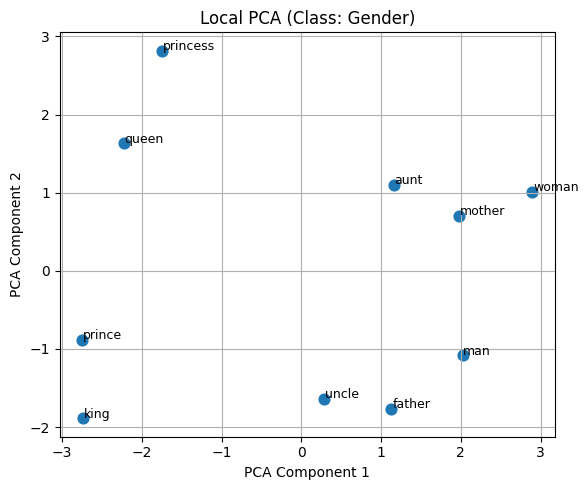

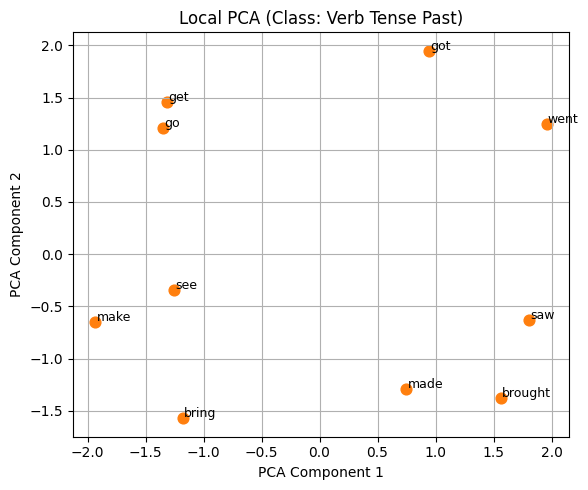

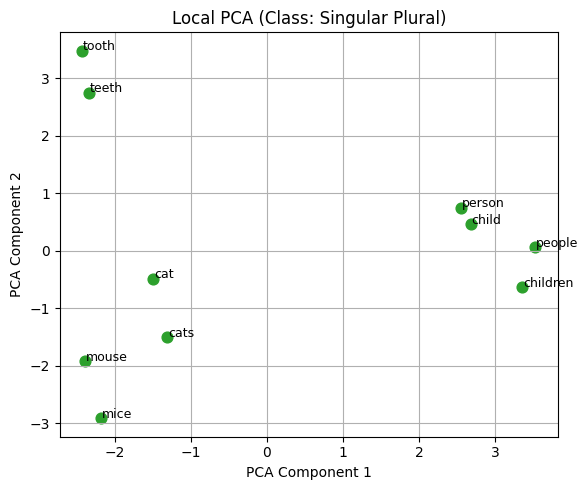

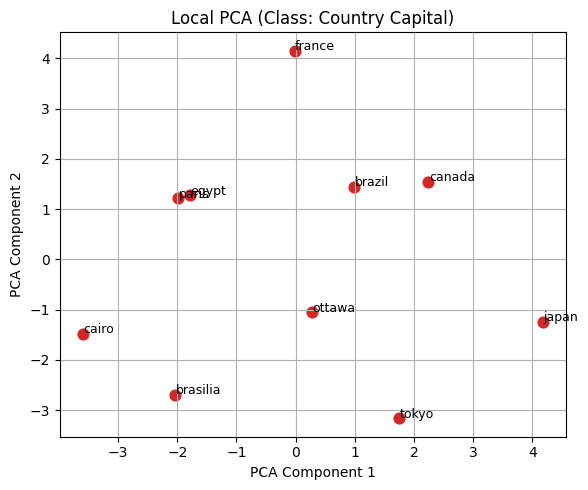

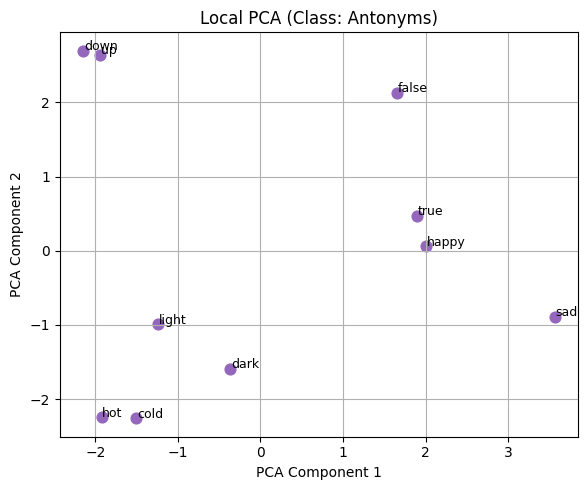

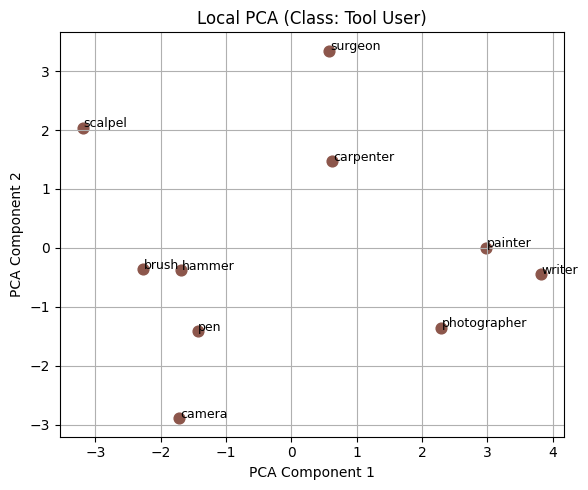

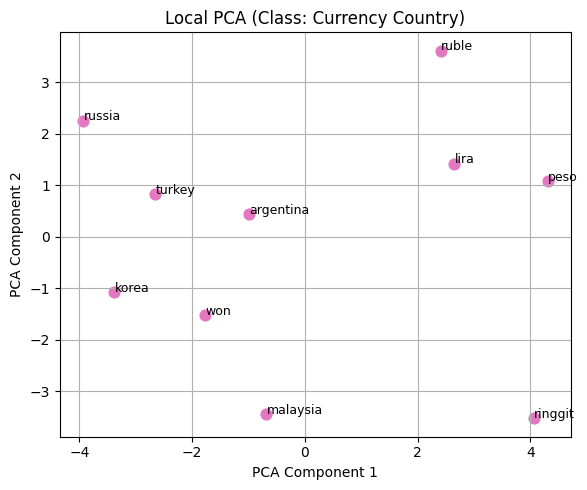

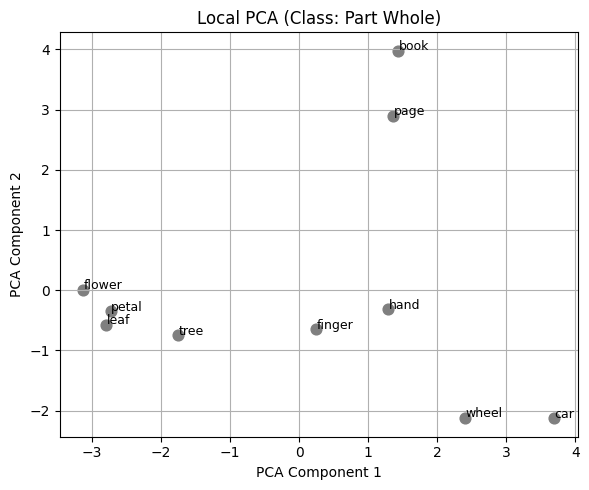

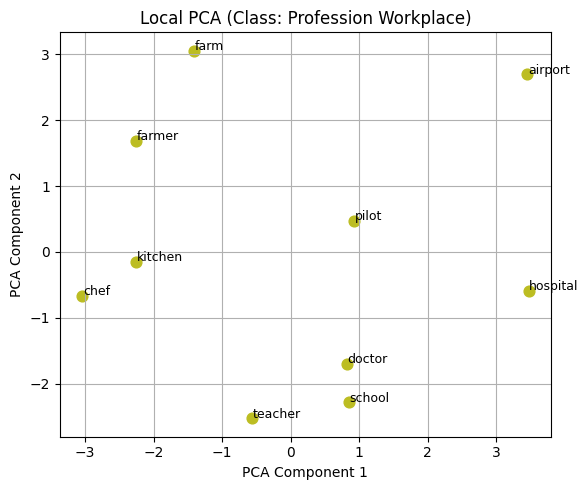

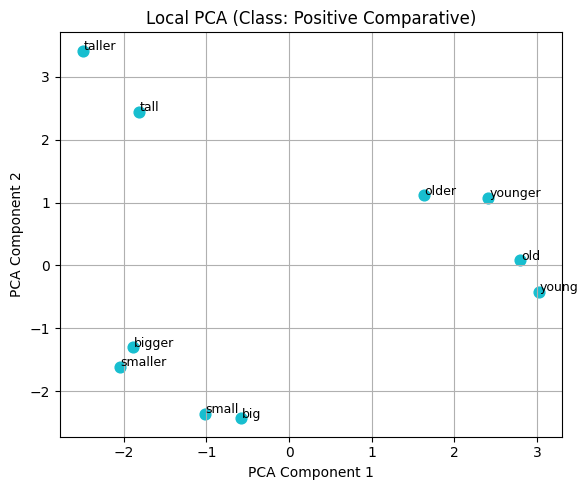

In [20]:
for class_name, pairs in classes.items():
    class_words = []
    for w1, w2 in pairs:
        class_words.append(w1)
        class_words.append(w2)

    class_vectors = np.vstack([embeddings_dict[w] for w in class_words])  # shape = (10, D)

    # Running PCA on this 10×D matrix → 10×2
    pca_local = PCA(n_components=2)
    coords_local = pca_local.fit_transform(class_vectors)  # shape = (10, 2)

    # Building a lookup: word → (x_local, y_local)
    local_word_to_coord = {w: coords_local[i] for i, w in enumerate(class_words)}

    # 5. Plotting the 10 points in 2D
    plt.figure(figsize=(6, 5))
    plt.title(f"Local PCA (Class: {class_name.replace('_', ' ')})")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")

    color = colors[class_name]
    for w in class_words:
        x, y = local_word_to_coord[w]
        plt.scatter(x, y, color=color, s=60)
        plt.text(x + 0.01, y + 0.01, w, fontsize=9)

    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Part 4: Embedding Arithmetic

In this section, we perform vector‐arithmetic analogies using our pre‐loaded word embeddings (`embeddings_dict`). For each of the 10 semantic classes, we:

1. Select one example pair (A → B) and a base word C  
   - For example, in the “Gender” class we choose:
     ```
     A = “man”,  B = “woman”,  C = “king”
     ```
   - We expect the result of the operation  
     ```
     vec(B) – vec(A) + vec(C)
     ```
     to land close to the vector for “queen.”

2. Fetch the embeddings for A, B, and C  
   - We look up `embeddings_dict[A]`, `embeddings_dict[B]`, and `embeddings_dict[C]`.  
   - Each lookup returns a fixed‐dimensional NumPy array (e.g. 100‐D).

3. Compute the analogy vector  
   - We form  
     ```
     analogy_vec = vec(B) – vec(A) + vec(C)
     ```  
   - This new vector is our “predicted” point in embedding space that should correspond to the target word (e.g. “queen”).

4. Find the top 5 nearest neighbors by cosine similarity  
   - We have already built a single NumPy matrix of shape `(V, D)` called `all_matrix`, containing **all** word vectors in `embeddings_dict`.  
   - We also computed `all_matrix_norm = all_matrix / ‖all_matrix‖` so that each row is unit‐length.  
   - To find nearest neighbors of `analogy_vec`, we:
     1. Normalize `analogy_vec` to unit length (call this `vec_norm`).  
     2. Compute cosine similarities as  
        ```
        sims = all_matrix_norm ⋅ vec_norm
        ```  
        which gives a similarity score for every word in `embeddings_dict`.  
     3. Sort those scores in descending order and pick the top 5 word indices, skipping any words in the set `{A, B, C}` so that we don’t return the original inputs.  
     4. Convert those indices back to words (via `all_vocab`) and record their cosine scores.

5. Print the top 5 closest words  
   - For each class, we print:
     ```
     Class: <ClassName>
       Analogy: <B> - <A> + <C>
       Top 5 closest words (word, cosine_similarity):
         <word1>    <score1>
         <word2>    <score2>
         …
         <word5>    <score5>
     ```
   - This lets us verify, for instance, that  
     ```
     vec("woman") – vec("man") + vec("king")
     ≈ vec("queen")
     ```
     if “queen” appears among the top‐5.

By repeating this for each of the 10 classes (one analogy per class), we can confirm whether embedding arithmetic captures the semantic relationships we expect (e.g., past‐tense transformations, singular↔plural, country↔capital, etc.).  


In [23]:
# Starting off with technicalities and defining the distance
# Ensuring embeddings_dict exists
try:
    _ = embeddings_dict["king"]
    print("Using embeddings_dict for analogy computations.")
except NameError:
    raise RuntimeError(
        "embeddings_dict not found."
    )

# Building a complete list and matrix of all words in embeddings_dict for nearest‐neighbor search
all_vocab = list(embeddings_dict.keys())                     # list of all loaded words
all_matrix = np.vstack([embeddings_dict[w] for w in all_vocab])  # shape = (V, D)

# Precomputing normalized versions for cosine similarity
all_matrix_norm = all_matrix / np.linalg.norm(all_matrix, axis=1, keepdims=True)

# Defining a helper to fetch vectors and compute cosine‐based top‐5 neighbors
def fetch_vector(word: str) -> np.ndarray:
    return embeddings_dict[word]

def knn_search_cosine(vec: np.ndarray, topn: int = 5, exclude: set = None):
    """
    This returns topn words (and cosine similarity) nearest to 'vec' among all_vocab.
    Optionally exclude any words in the 'exclude' set from the results.
    """
    if exclude is None:
        exclude = set()
    vec_norm = vec / np.linalg.norm(vec)
    sims = all_matrix_norm.dot(vec_norm)             # cosine similarities shape = (V,)
    # Sorting indices by descending similarity
    sorted_idx = np.argsort(-sims)
    neighbors = []
    for idx in sorted_idx:
        candidate = all_vocab[idx]
        if candidate in exclude:
            continue
        neighbors.append((candidate, float(sims[idx])))
        if len(neighbors) >= topn:
            break
    return neighbors


Using embeddings_dict for analogy computations.


In [24]:
# Defining one analogy (A→B) and a base C for each class
# Format: class_name: (A, B, C)
class_examples = {
    "Gender":               ("man",       "woman",     "king"),       # expect "queen"
    "Verb_Tense_Past":      ("go",        "went",      "see"),        # expect "saw"
    "Singular_Plural":      ("mouse",     "mice",      "person"),     # expect "people"
    "Country_Capital":      ("france",    "paris",     "japan"),      # expect "tokyo"
    "Antonyms":             ("hot",       "cold",      "up"),         # expect "down"
    "Tool_User":            ("pen",       "writer",    "brush"),      # expect "painter"
    "Currency_Country":     ("won",       "korea",     "peso"),       # expect "argentina"
    "Part_Whole":           ("wheel",     "car",       "leaf"),       # expect "tree"
    "Profession_Workplace": ("teacher",   "school",    "doctor"),     # expect "hospital"
    "Positive_Comparative": ("big",       "bigger",    "small"),      # expect "smaller"
}

# Computing analogy vectors and find top‐5 neighbors for each class
for class_name, (A, B, C) in class_examples.items():
    # Ensuring A, B, C are in embeddings_dict
    if A not in embeddings_dict or B not in embeddings_dict or C not in embeddings_dict:
        print(f"\nClass: {class_name} -- Skipping because one of {A}, {B}, or {C} is missing.")
        continue

    vec_A = fetch_vector(A)
    vec_B = fetch_vector(B)
    vec_C = fetch_vector(C)

    analogy_vec = vec_B - vec_A + vec_C

    # Excluding the original words A, B, C from the nearest neighbor results
    exclude_set = {A, B, C}
    neighbors = knn_search_cosine(analogy_vec, topn=5, exclude=exclude_set)

    # Printing results
    print(f"\nClass: {class_name}")
    print(f"  Analogy: {B} - {A} + {C}")
    print("  Top 5 closest words (word, cosine_similarity):")
    for word, score in neighbors:
        print(f"    {word:<15}  {score:.4f}")


Class: Gender
  Analogy: woman - man + king
  Top 5 closest words (word, cosine_similarity):
    queen            0.7834
    prince           0.6713
    princess         0.6644
    mother           0.6579
    father           0.6392

Class: Verb_Tense_Past
  Analogy: went - go + see
  Top 5 closest words (word, cosine_similarity):
    saw              0.8495
    brought          0.7274
    got              0.7047
    made             0.6820
    up               0.6314

Class: Singular_Plural
  Analogy: mice - mouse + person
  Top 5 closest words (word, cosine_similarity):
    people           0.6123
    children         0.5748
    woman            0.5358
    child            0.5301
    true             0.5210

Class: Country_Capital
  Analogy: paris - france + japan
  Top 5 closest words (word, cosine_similarity):
    tokyo            0.8922
    korea            0.5460
    russia           0.4011
    went             0.3987
    airport          0.3772

Class: Antonyms
  Analogy: cold 

# Part 5: Discussion

# Analysis of Global PCA (All 100 Words)

Below are key observations from the global 2D PCA plot, which projects all 100 word embeddings into two principal components:

1. Overall Layout
   - PC 1 (horizontal) largely separates geography-related words on the right (currencies and country/capitals) from other classes on the left.
   - PC 2 (vertical) further distinguishes adjectives/antonyms in the middle from “physical” nouns (parts/wholes) near the top and gender/profession words near the bottom.

2. Class Clusters
   - Currency–Country (pink) sits at the far right (PC 1 ≈ +2.8 to +3.5), forming a tight cluster with minimal overlap.
   - Country–Capital (red) lies just left of the pink area (PC 1 ≈ +1.0 to +2.5), also fairly compact but extending slightly downward.
   - Positive–Comparative (cyan) and Antonyms (purple) occupy the center (PC 1 ≈ 0 to +1.2). Comparatives cluster around (PC 2 ≈ +0.8 to +1.3) and overlap the antonym region (PC 2 ≈ +0.6 to +1.0).
   - Verb Tense (orange) forms a small group below center (PC 1 ≈ –0.3 to +0.3, PC 2 ≈ –0.8 to 0.0), indicating past-tense words share a common subspace.
   - Tool–User (brown) and Profession–Workplace (olive) overlap each other on the left side (PC 1 ≈ –0.8 to –0.3, PC 2 ≈ +1.0 to +2.0 for tools; PC 1 ≈ –1.5 to –0.5, PC 2 ≈ –1.3 to +0.2 for professions), reflecting shared “work/context” embeddings.
   - Part–Whole (gray) spreads across (PC 1 ≈ –0.6 to +0.1, PC 2 ≈ +1.7 to +3.2), with “leaf,” “petal,” “tooth,” “teeth” at the top and “wheel,” “car” lower, overlapping both Tool–User and Comparative regions.
   - Singular–Plural (green) splits into two subclusters: animal plurals (near PC 2 ≈ +1.3 to +3.1) overlap Part–Whole, while “person–people” and “child–children” sit near the lower-left Gender cluster.
   - Gender (blue) occupies the far-left, low region (PC 1 ≈ –2.0 to –1.0, PC 2 ≈ –2.2 to –1.3), with all five male→female pairs aligned in nearly parallel directions.

3. Preservation of Relationships
   - Gender and Verb Tense pairs appear as nearly parallel arrows, showing PCA preserved those semantic shifts.
   - Currency vs. Country/Capital is cleanly separated along PC 1, indicating a strong “geopolitical/monetary” axis.
   - Antonyms partially align along a negative–positive axis but overlap comparatives, so they do not form a completely isolated cluster.
   - Tool–User and Profession–Workplace overlap heavily, reflecting shared embedding contexts rather than a clear distinction.
   - Part–Whole and Singular–Plural intermingle (e.g. “finger” near “taller,” “mouse” near “leaf”), indicating PCA cannot fully disentangle these relationships.

4. Which Classes Behave Best or Worst
   - Best: Gender, Currency–Country, Country–Capital, and Verb Tense show clear, compact clusters.
   - Mixed: Antonyms vs. Comparatives show some separation but also overlap.
   - Overlapped: Tool–User, Profession–Workplace, Part–Whole, and Singular–Plural mix with other classes, indicating weaker separation in global PCA.

In summary, PCA captures major semantic axes (gender, geography, past tense) quite well, while classes with interwoven contexts (tools vs. professions, parts vs. plurals) appear mixed in 2D.


# Analysis of Class‐Specific Global PCA Plots

Below is a concise review of each of the 10 global‐space PCA charts. Each plot shows only that class’s 10 words positioned according to the same principal components used for the full 100-word PCA. We comment on clustering, pair alignment, overlaps, and any outliers.

---

## 1. Gender   

In the Gender plot, each male→female arrow points leftward and slightly upward. For instance, “king” shifts from the lower‐right toward “queen” at a higher, more leftward position; “man” shifts left and up to “woman,” and “father” shifts left and up to “mother.” All five pairs follow this same upward‐left direction, showing that PCA has isolated and preserved a consistent gender‐difference vector.


---

## 2. Verb Tense (Past)  

 In the Verb Tense (Past) plot, each base‐form shifts in a distinct direction when moving to its past form. “go” shifts almost straight downward to “went,” while “get” moves up and to the right to become “got.” “see” shifts slightly to the right with little vertical change when it becomes “saw.” At the same time, “make” moves down and a bit to the left to become “made,” and “bring” shifts upward and to the right to become “brought.” Because each pair follows a different trajectory rather than a single shared direction, local PCA does not isolate one uniform “present→past” axis; instead, each verb pair appears along its own distinct orientation in the two‐dimensional plot.


---

## 3. Singular ↔ Plural  
  
In the Singular–Plural plot, the animal‐related base words “cat,” “mouse,” and “tooth” all shift slightly to the right when they become “cats,” “mice,” and “teeth,” forming three parallel vectors that indicate a uniform “plural” direction for physical nouns. In contrast, the human nouns “child” and “person” move downward and to the right when they become “children” and “people,” creating a separate trajectory. Because these two subgroups point in nearly opposite directions, local PCA reveals a split between animal plurals and human plurals rather than collapsing them onto a single axis.  


---

## 4. Country ↔ Capital  

In the Country–Capital plot, each capital is positioned above its country, with a slight shift to the left or right depending on the pair. For example, “paris” appears above and a little left of “france,” and “tokyo” is above and slightly left of “japan.” While the five arrows are not perfectly parallel, they all point in a generally upward direction from country to capital, indicating that PCA has isolated a clear “country→capital” dimension without collapsing them into a single straight line.  

---

## 5. Antonyms  

  “hot→cold” and “light→dark” roughly follow a diagonal “lower‐left to upper‐right” shift. “true→false” shifts slightly right/up, whereas “happy→sad” shifts slightly right/down. “up→down” shifts right/upward. The directions are not perfectly parallel but generally align along a “positive⇄negative” axis.  

---

## 6. Tool ↔ User  
  
In the Tool–User plot, most tool→user arrows point down and to the left. For example, “hammer” shifts left and downward to “carpenter,” “brush” moves left and downward to “painter,” “pen” goes left and downward to “writer,” and “camera” shifts left and upward to “photographer.” Because the five arrows share a general down‐and‐left direction, local PCA captures a dominant “tool→user” trend.  


---

## 7. Currency ↔ Country   

Each (currency→country) arrow points downward: “lira→turkey,” “ruble→russia,” “ringgit→malaysia” all shift from PC 2 ≈ +2.0 to ≈ –0.5. Two visble clusters are formed. These five arrows are reasonably parallel, indicating a consistent “currency⇄country” direction.  

---

## 8. Part ↔ Whole  
  “leaf→petal” and “tree→flower” are nearly horizontal (PC 2 ≈ +3.3 to +3.2). “wheel→car” shifts sharply downward (PC 2 ~ +1.7 to –0.4) and slightly right. “page→book” shifts down and left. “finger→hand” shifts downward (~+2.2 to +0.45) and slightly left. While four of five arrows point downward, their horizontal offsets vary, so there is no single uniform “part→whole” vector.  

---

## 9. Profession ↔ Workplace   

Most profession→workplace arrows point to the right but vary in their vertical direction: “chef→kitchen” and “farmer→farm” move upward, while “doctor→hospital,” “teacher→school,” and “pilot→airport” move slightly downward, indicating that local PCA does not collapse these five pairs into a single uniform direction but instead reflects distinct subcontexts for each profession→place relationship.


---

## 10. Positive ↔ Comparative   
  
“young→younger” and “old→older” both shift upward. “big→bigger” and “small→smaller” shift upward and right (but with larger horizontal component). “tall→taller” shifts upward with small rightward change. While not perfectly parallel, all five pairs share a common upward‐and‐slightly‐rightward trend.  

---

### Summary of Global‐Space Class Plots

In the global PCA, some classes form tight, almost parallel groupings: Gender pairs align along a single upward‐left axis, Verb Tense pairs cluster along a nearly uniform present→past direction, and Currency–Country pairs lie in a compact vertical band at the far right. Country–Capital and Antonyms/Positive–Comparative show moderate cohesion—country→capital arrows point downward with slight horizontal variation, while antonym and comparative pairs occupy overlapping diagonals. By contrast, Tool–User and Profession–Workplace pairs scatter across multiple directions (e.g., most tool→user arrows slope down‐left but “scalpel→surgeon” deviates upward; chef→kitchen and farmer→farm shift up while doctor→hospital and teacher→school shift down), and Part–Whole and Singular–Plural split into distinct subclusters (animal plurals rise while human plurals fall; botanical, mechanical, textual part→whole relationships each follow different trends). Thus, PCA cleanly captures single‐axis relationships (gender, past tense, currency/country) but produces broader, overlapping clouds for classes with multiple semantic subcontexts.

This completes the analysis of the 10 class‐specific global PCA charts. Each chart reveals how well (or poorly) PC 1 & PC 2 preserve the semantic relationships (parallel shifts and tight clustering) when those 10 words are viewed in the context of all 100 embeddings.


# Analysis of Local PCA (Per Class)

Below are concise observations for each class’s local PCA plot (PCA computed only on that class’s 10 words). We focus on whether the five semantic pairs form a clear direction, how tightly they cluster, and any notable substructures.

---
## 1. Gender

The ten gender words can be easily seperated linearly: with male forms (“king,” “prince,” “man,” “father,” “uncle”) lie on one side, female forms (“queen,” “princess,” “woman,” “mother,” “aunt”) on the other. Each male→female arrow follows nearly the same upward‐sloping direction. Thus, the local PCA isolates a single “gender” dimension.

---

##2. Verb Tense (Past)
In the local PCA of these ten verbs, the five base forms (“go,” “get,” “see,” “make,” “bring”) lie on the left side, with “go” and “get” in the upper‐left, “see” just below them, and “make”/“bring” in the lower‐left. Their corresponding past forms (“went,” “got,” “saw,” “made,” “brought”) all appear on the right, but split between upper‐right (“went,” “got”) and lower‐right (“saw,” “made,” “brought”). Each base→past arrow generally points from left to right, but with “go→went” and “get→got” slanting upward, while “see→saw,” “make→made,” and “bring→brought” slant downward. In other words, local PCA still separates “present” verbs on the left from “past” verbs on the right, but there is an additional vertical split: some past forms are above and some are below, so the five arrows do not lie on one straight line.

---
## 3. Singular–Plural
The ten singular/plural words split into several subgroups rather than a single line. Animal‐related nouns (“cat,” “mouse,” “tooth”) and their plurals (“cats,” “mice,” “teeth”) occupy the left half, all pointing downward from singular to plural. Human nouns (“child,” “person”) shift downward to their plurals (“children,” “people”) in the other half. This indicates PCA separates “physical‐noun plurals” from “human‐noun plurals” in distinct directions, rather than encoding one unified plural axis.

---

## 4. Country–Capital

Each country→capital arrow (e.g., “france→paris,” “japan→tokyo,” “egypt→cairo”) points roughly downward, clustering capitals below countries. Although some horizontal variation exists (for example, “brazil→brasília” sits slightly to the left while “japan→tokyo” is farther right, while "paris" and "egypt", words from two groups, are situated right next to one another), the ten points form two clear horizontal bands (countries above, capitals below) with similar slopes. This shows PCA isolates a “country→capital” dimension.

---

## 5. Antonyms

In the antonym plot, words (“hot,” “light”) and their opposites (“cold,” “dark”) appear in the lower‐left quadrant and shift upward‐right to positive words (“up,” “down”). Meanwhile, pairs like “true→false” and “happy→sad” lie closer to the center, with “true→false” shifting upward and “happy→sad” shifting downward. All pairs roughly align along a “negative⇄positive” diagonal, but distances vary—some pairs (e.g. “hot→cold”) are more closer, revealing subtle differences in their embedding relationships.

---

##6. Tool–User

The tool–user words do not lie on a single line; instead, they form a scattered cloud. For instance, “scalpel→surgeon” shifts upward, while“brush→painter" shifts slightly right‐up “Camera→photographer” shifts strongly downward. This dispersion indicates multiple semantic subaxes (e.g., medical, art, writing) rather than one uniform “tool→user” direction.

---

##7. Currency–Country  
All five currency→country arrows (e.g., “ruble→russia,” “lira→turkey,” “ringgit→malaysia”) point downward, with currencies at the top and their corresponding countries at the bottom. The vertical separation is very clear, and the arrows are nearly parallel, demonstrating that PCA captures a single “currency⇄country” axis with the "korea-won" pair as sort of an exception to that rule.

---

##8. Part–Whole
Part–whole pairs occupy distinct sectors of the plot rather than a straight line. “Leaf→petal” and “tree→flower” shift horizontally upward, while “wheel→car” shifts downward‐right and “page→book” shifts upward-right. “Finger→hand” shifts upward. These varied arrow directions show that multiple “part→whole” relationships span different semantic subspaces (e.g., botanical vs. mechanical vs. textual), so PCA yields a more 2D arrangement.

---

##9. Profession–Workplace
All profession→workplace arrows point rightward and upward. “chef” shifts right/up to “kitchen,” “farm” shifts right/up to “farmer,” “doctor” shifts right/up to “hospital,” “teacher” shifts right/up to “school,” and “pilot” shifts right/up to “airport.” Although the individual points are spread over a wide area (e.g., “chef” at far left, “airport” at far right), PCA captures a single “profession→workplace” direction since every arrow aligns in the same up-and-right orientation.

---


##10. Positive–Comparative  
Comparative pairs mostly follow a single upward‐sloping axis: “big→bigger” and “small→smaller” shift downward in PC 1 while “tall→taller” shifts upward, but all move upward in PC 2. “Young→younger” and “old→older” also align along this diagonal, though with less horizontal change. Overall, these points lie along a single trend line from lower‐right (adjectives) to upper‐left (comparatives), indicating a coherent “x→more‐x” direction with minor deviations.

---
## Summary of the plot analysis

In summary, local PCA cleanly isolates a single semantic axis when all five pairs share a uniform relationship (Gender, Verb Tense, Country–Capital, Currency–Country, Positive–Comparative). When pairs draw on different contexts or sub‐domains (Singular–Plural, Antonyms, Tool–User, Part–Whole, Profession–Workplace), PCA produces multi‐directional or split layouts, reflecting those classes’ internal semantic diversity.


# Embedding Arithmetic Results

Below is an analysis of the analogy outputs, based on the top‐5 nearest neighbors (and their cosine scores) for each class.

When we look at whether the closest words are meaningful, we see that in the Gender analogy (“woman – man + king”), “queen” appears at the top with a high similarity (0.7834), followed by related royalty terms (“prince,” “princess”) and even “mother” and “father,” which still belong to the gender semantic space. This confirms that the intended target shows up correctly, and the other top contenders remain semantically coherent. In Verb Tense (“went – go + see”), the top neighbor is “saw” (0.8495), exactly as expected; the remaining neighbors (“brought,” “got,” “made”) are all past‐tense verbs, so the semantic shift is preserved. For Singular–Plural (“mice – mouse + person”), “people” appears first (0.6123), which matches the plural target; the next neighbors include “children” (0.5748), “woman,” and “child,” which are plausible human plurals, though “true” is less clearly related. In Country–Capital (“paris – france + japan”), “tokyo” sits at the top with a very high score (0.8922), so the correct capital emerges; the other neighbors (“korea,” “russia,” even “airport”) reflect the geography domain but are less directly related. In Antonyms (“cold – hot + up”), “down” appears first (0.7715), perfectly capturing the opposite of “up”; the remaining neighbors (“brought,” “hand,” “bring,” “make”) are unrelated verbs and nouns, suggesting some noise beyond the antonym pair. In Tool–User (“writer – pen + brush”), “photographer” (0.4994) and “painter” (0.4520) top the list, which is semantically reasonable since they are analogous “user” roles for their respective tools, while the other neighbors drift into broader “occupation” territory (“carpenter,” “teacher,” “book”). In Currency–Country (“korea – won + peso”), “ruble” (0.5049) and “japan” (0.4329) appear most similar, indicating a loose “currency→country” relationship but with less precision: “ruble” is another currency rather than strictly the target country. In Part–Whole (“car – wheel + leaf”), “tree” (0.5586) and “flower” (0.5515) appear first, correctly identifying botanical wholes for “leaf,” though the next neighbors (“farm,” “farmer,” “small”) stray into unrelated contexts. In Profession–Workplace (“school – teacher + doctor”), “hospital” (0.7497) emerges clearly, matching the target workplace, but then “went,” “children,” “made,” and “child” follow, which are unrelated verbs and nouns. Finally, in Positive–Comparative (“bigger – big + small”), “smaller” (0.8575) appears at the top, exactly matching the expected comparative form, while the other neighbors (“bring,” “make,” “older,” “light”) reflect loosely positive or action‐oriented contexts.

Overall, the analogies that reliably returned the correct target or a closely related term were Gender, Verb Tense, Country–Capital, Profession–Workplace, and Positive–Comparative. These classes produced a high‐ranking exact match or a very close semantic neighbor (e.g., “queen,” “saw,” “tokyo,” “hospital,” “smaller”). Singular–Plural also worked reasonably well by returning “people” and “children,” even though it included one less relevant neighbor (“true”). Antonyms succeeded in retrieving “down,” but then returned unrelated verbs, indicating that antonymy is partly captured but also noisy. Tool–User and Part–Whole analogies produced more mixed results: they retrieved some sensible “user” or “whole” terms (“photographer,” “painter,” “tree,” “flower”) but also surfaced neighbors outside the intended semantic shift. Currency–Country placed “ruble” first—another currency rather than the targeted country—so it partially captured the monetary domain but did not directly return the expected country.

In comparing classes, the best‐behaved analogies are those whose semantic transformation corresponds to a very consistent embedding shift (e.g., “woman – man + king,” “went – go + see,” “paris – france + japan,” “bigger – big + small”). These classes exhibit a simple, uniform relationship that embeddings encode strongly. By contrast, classes with more complex or overlapping contexts (Tool–User, Part–Whole, Currency–Country) show more noise: the computed vectors land near the correct domain but do not narrowly isolate the intended target. Antonyms fall in between—“down” surfaces correctly, but the next neighbors are not antonyms of “up.” Thus, classes requiring multifaceted common contexts (e.g., “pen→writer” versus “brush→painter”) or involving multiple types of wholes (“leaf→tree” versus “car→wheel”) are less reliably handled by a single vector difference. In summary, embedding arithmetic excels at clear, high‐frequency semantic shifts (gender, tense, capital, comparative) but becomes less precise when relationships are not very "precise" or drawn from varied subcontexts.  
